<a href="https://colab.research.google.com/github/KhandareAshutosh/IPL_Prediction_ML_Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import plotly.graph_objs as go

In [ ]:
import altair as alt

In [ ]:
from plotly.offline import init_notebook_mode,iplot

In [ ]:
from sklearn import preprocessing

In [ ]:
import numpy as np

In [ ]:
import pandas as pd 
deliveries=pd.read_csv('/content/drive/MyDrive/Wids_IPL_Analysis_Data/IPL_Ball_by_Ball_2008_2022.csv')

In [ ]:

matches=pd.read_csv('/content/drive/MyDrive/Wids_IPL_Analysis_Data/IPL_Matches_2008_2022.csv')

In [ ]:
matches

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [ ]:
#Filling the values of City based on Venue
conditions = [matches["Venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["Venue"] == "Maharashtra Cricket Association Stadium",
              matches["Venue"] == "Saurashtra Cricket Association Stadium", matches["Venue"] == "Holkar Cricket Stadium",
              matches["Venue"] == "M Chinnaswamy Stadium",matches["Venue"] == "Wankhede Stadium",
              matches["Venue"] == "Eden Gardens",matches["Venue"] == "Feroz Shah Kotla",
              matches["Venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["Venue"] == "Green Park",
              matches["Venue"] == "Punjab Cricket Association Stadium, Mohali",matches["Venue"] == "Dr DY Patil Sports Academy",
              matches["Venue"] == "Sawai Mansingh Stadium", matches["Venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["Venue"] == "Newlands", matches["Venue"] == "St George's Park" , 
              matches["Venue"] == "Kingsmead", matches["Venue"] == "SuperSport Park",
              matches["Venue"] == "Buffalo Park", matches["Venue"] == "New Wanderers Stadium",
              matches["Venue"] == "De Beers Diamond Oval", matches["Venue"] == "OUTsurance Oval", 
              matches["Venue"] == "Brabourne Stadium",matches["Venue"] == "Sardar Patel Stadium", 
              matches["Venue"] == "Barabati Stadium", matches["Venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["Venue"] == "Himachal Pradesh Cricket Association Stadium",matches["Venue"] == "Nehru Stadium",
              matches["Venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["Venue"] == "Subrata Roy Sahara Stadium",
              matches["Venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["Venue"] == "JSCA International Stadium Complex",
              matches["Venue"] == "Sheikh Zayed Stadium",matches["Venue"] == "Sharjah Cricket Stadium",
              matches["Venue"] == "Dubai International Cricket Stadium",matches["Venue"] == "M. A. Chidambaram Stadium",
              matches["Venue"] == "Feroz Shah Kotla Ground",matches["Venue"] == "M. Chinnaswamy Stadium",
              matches["Venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["Venue"] == "IS Bindra Stadium",matches["Venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['City'] = np.where(matches['City'].isnull(),
                              np.select(conditions, values),
                              matches['City'])

#Removing records having null values in "WinningTeam" column
matches=matches[matches["WinningTeam"].notna()]

In [ ]:
matches.replace(['Rising Pune Supergiants']
                ,['Rising Pune Supergiant'],inplace=True)

<ipython-input-9-90a4c488b204>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
matches.replace(['2007/08']
                ,['2008'],inplace=True)

<ipython-input-10-bafc022de440>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
matches.replace(['2007/08','2020/21','2009/10']
                ,['2008','2020','2010'],inplace=True)

<ipython-input-11-4f6073fe9821>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
matches['Season'].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2010', '2009', '2008'],
      dtype=object)

In [ ]:
matches = matches.drop(columns=['method'], axis=1)

In [ ]:
mean_value=matches['Margin'].mean()

In [ ]:
matches['Margin'].fillna(value=mean_value, inplace=True)

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
teams_per_season = matches.groupby('Season')['WinningTeam'].value_counts()
teams_per_season

Season  WinningTeam          
2008    Rajasthan Royals         13
        Kings XI Punjab          10
        Chennai Super Kings       9
        Delhi Daredevils          7
        Mumbai Indians            7
                                 ..
2022    Punjab Kings              7
        Kolkata Knight Riders     6
        Sunrisers Hyderabad       6
        Chennai Super Kings       4
        Mumbai Indians            4
Name: WinningTeam, Length: 126, dtype: int64

In [ ]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    
    if items[0][0]==str(year):
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

(('2008', 'Rajasthan Royals'), 13)
(('2009', 'Delhi Daredevils'), 10)
(('2010', 'Mumbai Indians'), 11)
(('2011', 'Chennai Super Kings'), 11)
(('2012', 'Kolkata Knight Riders'), 12)
(('2013', 'Mumbai Indians'), 13)
(('2014', 'Kings XI Punjab'), 12)
(('2015', 'Chennai Super Kings'), 10)
(('2016', 'Sunrisers Hyderabad'), 11)
(('2017', 'Mumbai Indians'), 12)
(('2018', 'Chennai Super Kings'), 11)
(('2019', 'Mumbai Indians'), 11)
(('2020', 'Mumbai Indians'), 11)
(('2021', 'Chennai Super Kings'), 11)
(('2022', 'Gujarat Titans'), 12)


<ipython-input-18-15f5daf1eba0>:10: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

<ipython-input-18-15f5daf1eba0>:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-18-15f5daf1eba0>:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-18-15f5daf1eba0>:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-18-15f5daf1eba0>:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-18-15f5daf1eba0>:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipytho

In [ ]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


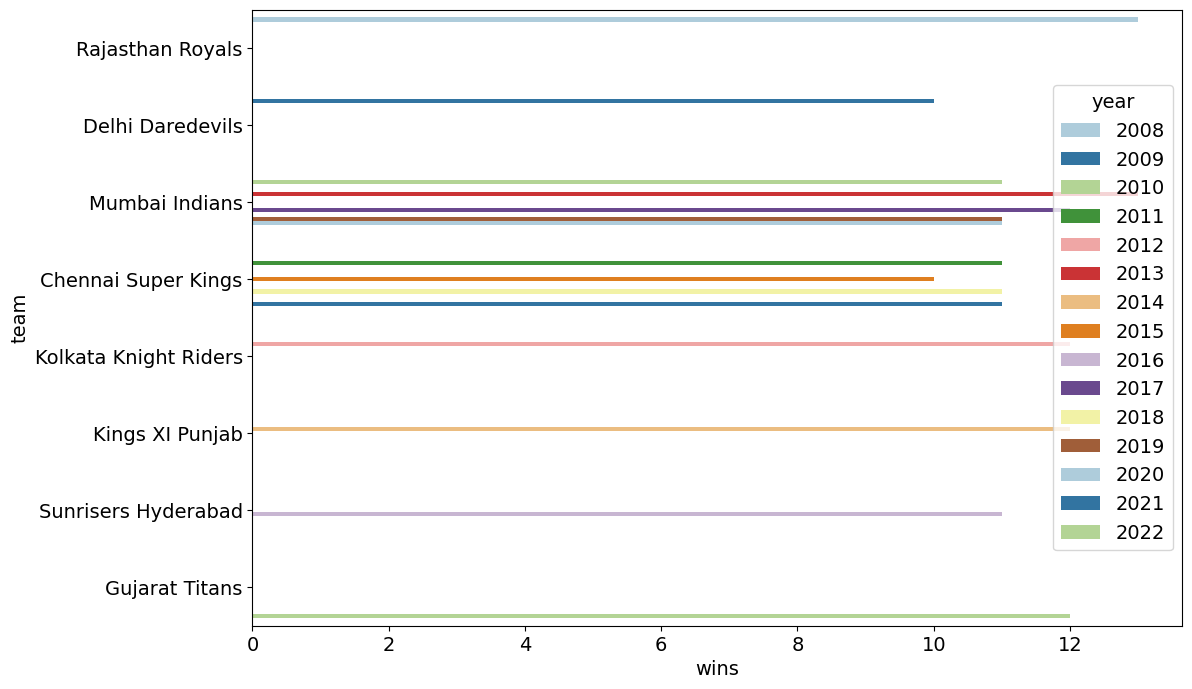

In [ ]:
sns.barplot(x='wins', y='team',hue='year', data=win_per_season_df, palette='Paired');

In [ ]:
venue_ser = matches['Venue'].value_counts()

In [ ]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

<ipython-input-22-a0b0837cfc19>:2: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

<ipython-input-22-a0b0837cfc19>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-a0b0837cfc19>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-a0b0837cfc19>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-a0b0837cfc19>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-22-a0b0837cfc19>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-inpu

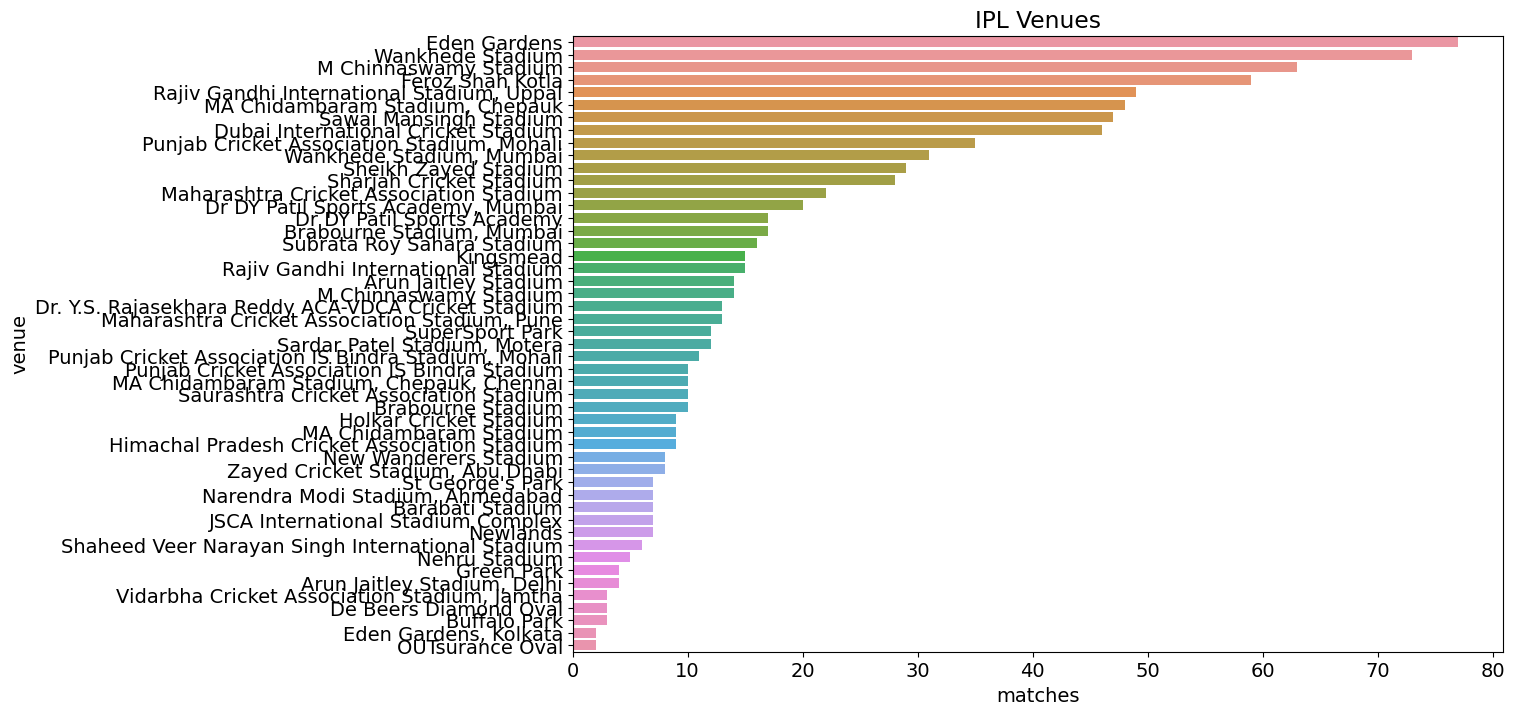

In [ ]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

In [ ]:
total_matches_played = (matches.Team2.value_counts() + matches.Team1.value_counts()).sort_values(ascending = False)
total_matches_played

Mumbai Indians                 231
Kolkata Knight Riders          223
Royal Challengers Bangalore    223
Chennai Super Kings            208
Kings XI Punjab                190
Rajasthan Royals               190
Delhi Daredevils               159
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   45
Gujarat Lions                   30
Rising Pune Supergiant          30
Punjab Kings                    28
Gujarat Titans                  16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
dtype: int64

In [ ]:
most_wins = matches.WinningTeam.value_counts()

In [ ]:
win_percentage = (most_wins / total_matches_played).sort_values(ascending = False) * 100
win_percentage

Gujarat Titans                 75.000000
Lucknow Super Giants           60.000000
Chennai Super Kings            58.173077
Delhi Capitals                 57.142857
Mumbai Indians                 56.709957
Kolkata Knight Riders          51.121076
Rajasthan Royals               50.526316
Rising Pune Supergiant         50.000000
Sunrisers Hyderabad            49.342105
Royal Challengers Bangalore    48.878924
Punjab Kings                   46.428571
Kings XI Punjab                46.315789
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               42.138365
Deccan Chargers                38.666667
Pune Warriors                  26.666667
dtype: float64

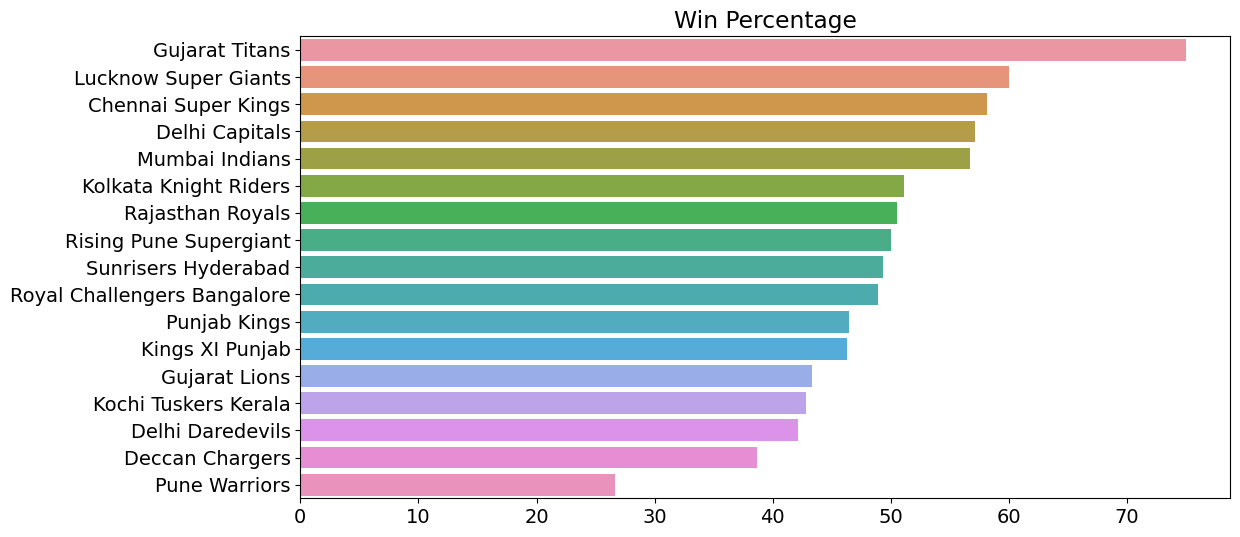

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Win Percentage')
win_percentage_plot = sns.barplot(y = win_percentage.index, x = win_percentage)


In [ ]:
s_man_of_match = (matches.groupby(matches.Player_of_Match).Player_of_Match.count().
                  sort_values(ascending=False).head(15))

df_man_of_match =(s_man_of_match.to_frame().rename
                  (columns = {"Player_of_Match": "times"}).reset_index())

In [ ]:
data = [go.Bar(x=df_man_of_match['Player_of_Match'], 
               y=df_man_of_match["times"], 
               marker=dict(color='#EB89B5'),opacity=0.75)]

layout = go.Layout(title='Man of the Matches ',
                   xaxis=dict(title='Player',tickmode='linear'),
                   yaxis=dict(title='Count'),bargap=0.2)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
most_toss_wins = matches.TossWinner.value_counts()

In [ ]:
toss_win_percentage = (most_toss_wins / total_matches_played).sort_values(ascending = False) * 100
toss_win_percentage

Gujarat Titans                 62.500000
Deccan Chargers                57.333333
Kochi Tuskers Kerala           57.142857
Delhi Capitals                 57.142857
Mumbai Indians                 53.246753
Chennai Super Kings            52.403846
Kolkata Knight Riders          51.121076
Rajasthan Royals               51.052632
Gujarat Lions                  50.000000
Delhi Daredevils               49.685535
Sunrisers Hyderabad            48.684211
Lucknow Super Giants           46.666667
Royal Challengers Bangalore    46.636771
Kings XI Punjab                44.736842
Pune Warriors                  44.444444
Rising Pune Supergiant         43.333333
Punjab Kings                   32.142857
dtype: float64

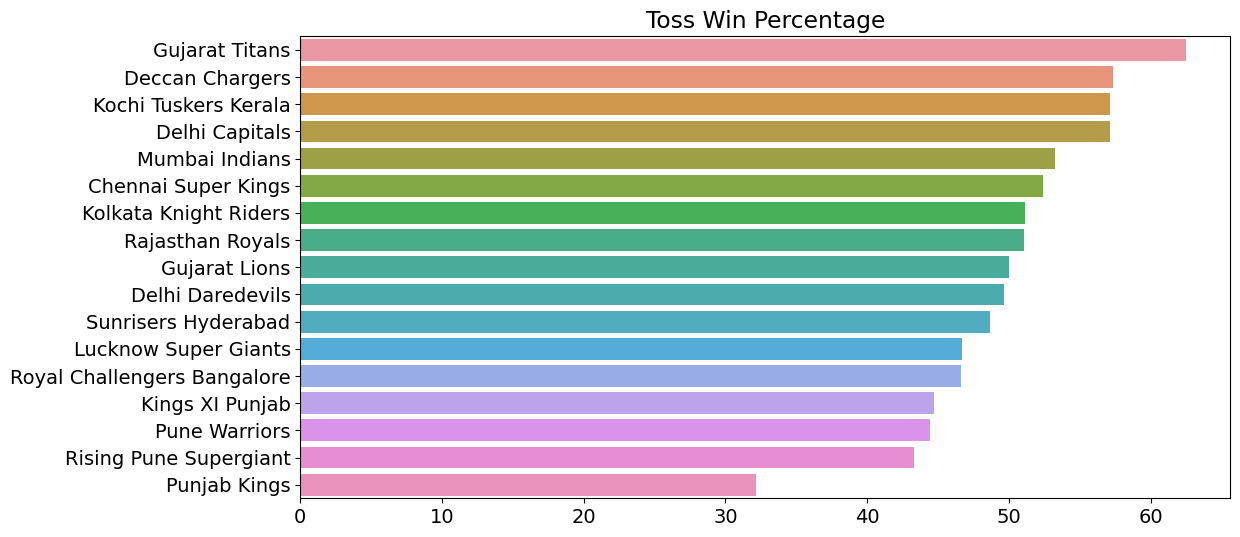

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Toss Win Percentage')
win_percentage_plot = sns.barplot(y = toss_win_percentage.index, x = toss_win_percentage)


In [ ]:
won_by_wickets = matches.loc[matches['WonBy'] == 'Wickets']

In [ ]:

greatest_won_by_wickets = won_by_wickets.sort_values(by='Margin', ascending=False).head(10)

<Axes: xlabel='WinningTeam'>

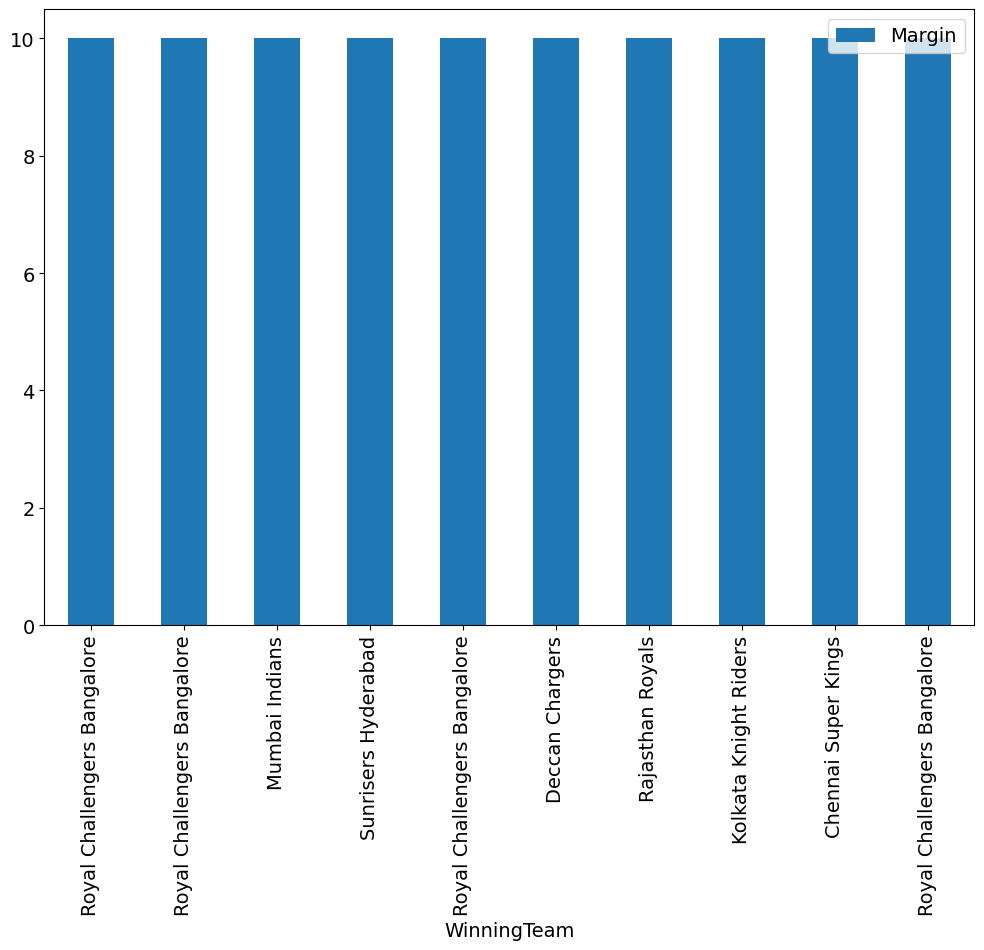

In [ ]:
greatest_won_by_wickets.plot(x="WinningTeam", y="Margin", kind="bar")

In [ ]:
won_by_runs = matches.loc[matches['WonBy'] == 'Runs']

In [ ]:

greatest_won_by_runs = won_by_runs.sort_values(by='Margin', ascending=False).head(10)

<Axes: xlabel='WinningTeam'>

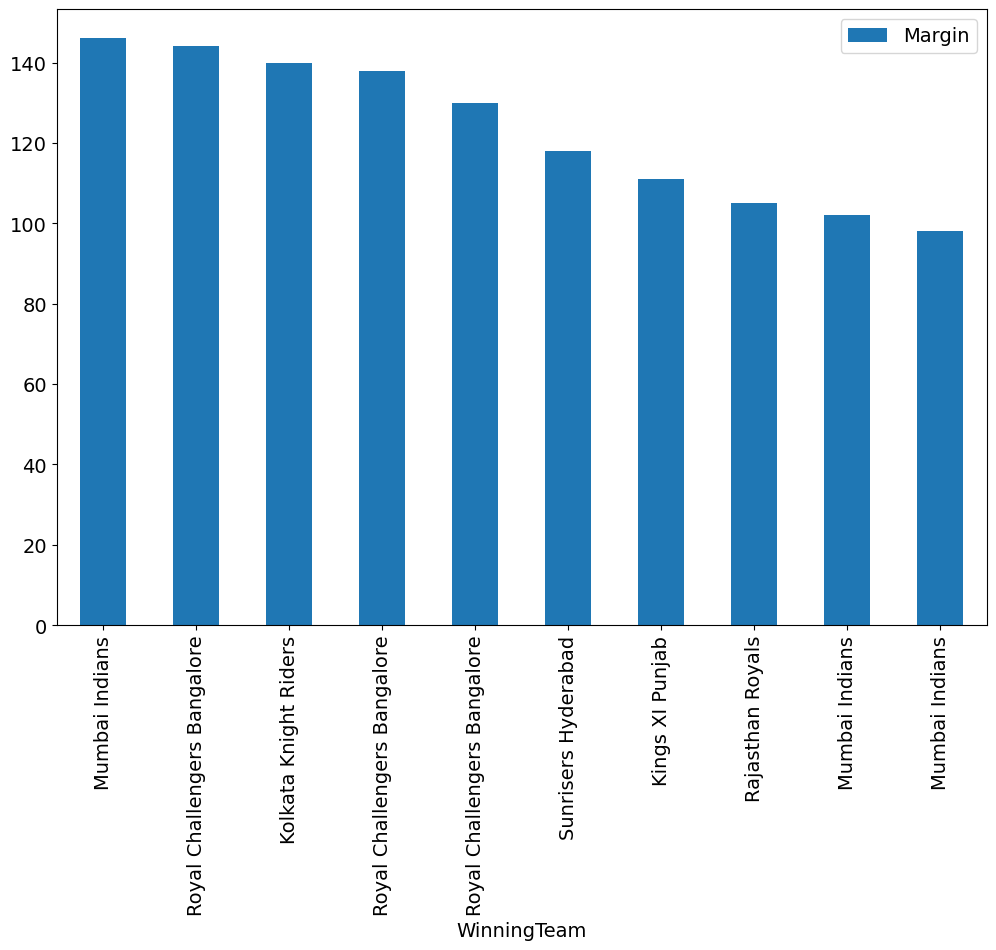

In [ ]:
greatest_won_by_runs.plot(x="WinningTeam", y="Margin", kind="bar")

In [ ]:
matches['Team2Players'] = matches['Team2Players'].str.split(', ')
new_df2 = matches.explode('Team2Players')



In [ ]:
matches['Team1Players'] = matches['Team1Players'].str.split(', ')
new_df1 = matches.explode('Team1Players')


In [ ]:
new_df2['Team2Players']

0          ['WP Saha'
0      'Shubman Gill'
0           'MS Wade'
0         'HH Pandya'
0         'DA Miller'
            ...      
949         'WP Saha'
949      'AB Agarkar'
949        'AB Dinda'
949        'M Kartik'
949       'I Sharma']
Name: Team2Players, Length: 10406, dtype: object

In [ ]:
new_df1['Team1Players']

0      ['YBK Jaiswal'
0        'JC Buttler'
0         'SV Samson'
0        'D Padikkal'
0        'SO Hetmyer'
            ...      
949         'B Akhil'
949       'AA Noffke'
949         'P Kumar'
949          'Z Khan'
949       'SB Joshi']
Name: Team1Players, Length: 10406, dtype: object

In [ ]:
player1 = new_df1['Team1Players'].value_counts()
player2 = new_df2['Team2Players'].value_counts()

In [ ]:
players_df = pd.concat([player1, player2], axis=1)
players_df

,Team1Players,Team2Players
'MS Dhoni',123.0,110.0
'KD Karthik',116.0,111.0
'SK Raina',110.0,94.0
'R Ashwin',103.0,78.0
'V Kohli',101.0,79.0
...,...,...
'K Upadhyay',NaN,1.0
['LA Pomersbach',NaN,1.0
['A Mukund',NaN,1.0
'KW Richardson'],NaN,1.0


In [ ]:
player_ser = players_df.sum(axis=1)

player_df = pd.DataFrame(columns=["player", "matches"])

for items in player_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'player':[items[0]],
        'matches':[items[1]]
    })
    player_df= player_df.append(temp_df4, ignore_index=True) 

<ipython-input-45-8abd38714ced>:5: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

<ipython-input-45-8abd38714ced>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-45-8abd38714ced>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-45-8abd38714ced>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-45-8abd38714ced>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-45-8abd38714ced>:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython

In [ ]:
player_df.sort_values('matches', ascending=False).head()

,player,matches
0,'MS Dhoni',233.0
1,'KD Karthik',227.0
5,'RA Jadeja',209.0
2,'SK Raina',204.0
6,'KA Pollard',189.0


In [ ]:
deliveries.rename(columns={'batter': 'batsman'}, inplace=True)


In [ ]:
s_man_of_match = (matches.groupby(matches.Player_of_Match).Player_of_Match.count().
                  sort_values(ascending=False).head(15))

df_man_of_match =(s_man_of_match.to_frame().rename
                  (columns = {"Player_of_Match": "times"}).reset_index())

cen = deliveries.groupby(['batsman','ID']).agg({'batsman_run':'sum'})
cen = cen[cen['batsman_run']>=100]
cen = cen.groupby(['batsman']).agg({'count'})
cen.columns = cen.columns.droplevel()
cen = cen.sort_values(by='count',ascending=False).reset_index()

In [ ]:
half_cen = deliveries.groupby(['batsman','ID']).agg({'batsman_run':'sum'})
half_cen = half_cen[half_cen['batsman_run']>=50]
half_cen = half_cen[half_cen['batsman_run']<100]
half_cen = half_cen.groupby(['batsman']).agg({'count'})
half_cen.columns = half_cen.columns.droplevel()
half_cen = half_cen.sort_values(by='count',ascending=False).reset_index()

In [ ]:
df_big = pd.merge(cen,half_cen, on='batsman',how='right')
df_big = df_big.fillna(0)

df_strike_rate = deliveries.groupby(['batsman']).agg({'ballnumber':'count','batsman_run':'mean'}).sort_values(by='batsman_run',ascending=False)
df_strike_rate.rename(columns ={'batsman_run' : 'strike rate'}, inplace=True)

df_runs_per_match = deliveries.groupby(['batsman','ID']).agg({'batsman_run':'sum'})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()

In [ ]:
df_sixes = deliveries[['batsman','batsman_run']][deliveries.batsman_run==6].groupby(['batsman']).agg({'batsman_run':'count'})
df_four = deliveries[['batsman','batsman_run']][deliveries.batsman_run==4].groupby(['batsman']).agg({'batsman_run':'count'})

df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),
                                    df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)

df_batsman_stat.rename(columns = {'ballnumber' : 'Ball', 'strike rate':'Strike Rate','batsman run' : 'Batsman Run','match count' : 'Match Count',
                                  'average score' : 'Average score' ,'batsman_run_x' :'Six','batsman_run_y':'Four'},inplace=True)
df_batsman_stat['Strike Rate'] = df_batsman_stat['Strike Rate']*100
df_batsman_stat = df_batsman_stat.sort_values(by='Batsman Run',ascending=False).reset_index()

batsman_stats = pd.merge(df_batsman_stat,df_big, on='batsman',how='left').fillna(0)
batsman_stats.rename(columns = {'count_x' : '100s', 'count_y' : '50s'},inplace=True)

In [ ]:
centuries = batsman_stats.sort_values(by='100s').tail(15)
half_centuries = batsman_stats.sort_values(by='50s').tail(15)


fig = {"data" : [{"x" : centuries["batsman"],"y" : centuries["100s"],
                  "name" : "100s","marker" : {"color" : "lightblue","size": 12},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" ,
                  "xaxis" : "x1","yaxis" : "y1"},
        
                 {"x" : half_centuries["batsman"],"y" : half_centuries["50s"],
                  "name" : "50s","marker" : {"color" : "brown","size": 12},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2"}],
       
        "layout" : {"title": "Total centuries and half-centuries by top batsman",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : True},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "50s"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Batsman"},
                    "yaxis" : {"domain" :[0, .45], "anchor" : "x2","title": "100s"}}}

iplot(fig)

In [ ]:
cen = batsman_stats[['100s','50s','batsman']]
cen['points'] = (cen['100s']*8) + (cen['50s']*4)
cen.sort_values(by='points',inplace=True,ascending=False)



trace = go.Table(
    domain=dict(x=[0, 0.55],
                y=[0, 1.0]),
    header=dict(values=["Batsman","Points","100s","50s"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[cen['batsman'].head(10), cen['points'].head(10), cen['100s'].head(10), cen['50s'].head(10)],
               fill = dict(color = ['#25FEFD', 'white']),
               align = ['center']))

trace1 = go.Bar(x=cen['batsman'].head(10),
                y=cen["points"].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='brown'),opacity=0.60)



layout = dict(
    width=830,
    height=415,
    autosize=False,
    title='Batsman with highest points by centuries and half centuries',
    margin = dict(t=100),
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.65, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

<ipython-input-53-793956cf2821>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-793956cf2821>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
runs = batsman_stats[['Six','Four','Batsman Run','batsman']]
runs['point'] = (runs['Six']*1) + (runs['Four']*0.5) + (runs['Batsman Run']*0.5)
runs.sort_values(by='point',inplace=True,ascending=False)

<ipython-input-54-bcbbdbe2f6ad>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-bcbbdbe2f6ad>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
final = pd.merge(cen,runs,on='batsman', how='inner')
final['total_points']=final['points']+final['point']
final['max'] = final['100s']+final['50s']

final.sort_values(by='total_points',ascending=False,inplace=True)
best_batsman = final[['batsman','total_points']]

In [ ]:
final['Batsman Run'] = (final['Batsman Run'])/(final['Batsman Run'].max()/100)
final['Six'] = (final['Six'])/(final['Six'].max()/100)
final['Four'] = (final['Four'])/(final['Four'].max()/100)
final['max'] = (final['max'])/(final['max'].max()/100)
final['total_points'] = (final['total_points'])/(final['total_points'].max()/100)

In [ ]:
name1 = input("Give name 1 to compare ")
name2 = input("Give name 2 to compare ")
name3 = input("Give name 3 to compare ")
x = final[final["batsman"] == name1]
y = final[final["batsman"] == name2]
z = final[final["batsman"] == name3]

data = [go.Scatterpolar(
  r = [x['Four'].values[0],x['Six'].values[0],x['Batsman Run'].values[0],x['max'].values[0],x['total_points'].values[0]],
  theta = ['Four','Six','Runs','Centuries','Points'],
  fill = 'toself', opacity = 0.8,
  name = name1),
        
    go.Scatterpolar(
  r = [y['Four'].values[0],y['Six'].values[0],y['Batsman Run'].values[0],y['max'].values[0],y['total_points'].values[0]],
  theta = ['Four','Six','Runs','Centuries','Points'],
  fill = 'toself',subplot = "polar2",
    name = name2),

      go.Scatterpolar(
  r = [z['Four'].values[0],z['Six'].values[0],z['Batsman Run'].values[0],z['max'].values[0],z['total_points'].values[0]],
  theta = ['Four','Six','Runs','Centuries','Points'],
  fill = 'toself',subplot = "polar3",
    name = name3)]

layout = go.Layout(title = "Comparison Between "+ name1 + ", " + name2 +" and " + name3,
                   
                   polar = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.25],y = [0, 1])),
                  
                   polar2 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.35, 0.65],y = [0, 1])),
                  
                   polar3 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.75, 1.0],y = [0, 1])),)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
key='batsman'
topbatsmen=deliveries[key].value_counts()[:50].index

In [ ]:
cm = sns.light_palette("blue", as_cmap=True)

In [ ]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]
deliveries.pivot_table(index='overs',aggfunc='count',columns='ballnumber',values='player_out').style.apply(highlight_max).format("{:.1f}")

ballnumber,1,2,3,4,5,6,7,8,9,10
overs,,,,,,,,,,
0,63.0,59.0,54.0,62.0,68.0,73.0,13.0,3.0,0.0,nan
1,54.0,67.0,72.0,71.0,75.0,74.0,16.0,4.0,0.0,0.0
2,69.0,85.0,79.0,73.0,78.0,73.0,8.0,1.0,0.0,0.0
3,71.0,59.0,98.0,96.0,60.0,72.0,12.0,1.0,1.0,0.0
4,72.0,75.0,77.0,78.0,76.0,95.0,12.0,0.0,0.0,0.0
5,65.0,83.0,80.0,78.0,81.0,75.0,10.0,2.0,0.0,0.0
6,68.0,58.0,56.0,66.0,69.0,60.0,7.0,1.0,0.0,0.0
7,51.0,71.0,78.0,67.0,65.0,58.0,12.0,0.0,0.0,nan
8,68.0,84.0,80.0,82.0,64.0,70.0,12.0,2.0,1.0,0.0


In [ ]:
df_=deliveries.pivot_table(index=['batsman','overs'],aggfunc=['count','sum'],values='batsman_run'
                  )

df_=df_.fillna(0).reset_index()
df_.columns=['batsman','overs','balls','runs']
df_['strike_rate']=round(df_.runs/df_.balls*100,1)
df_[df_.batsman.isin(topbatsmen)
   ].pivot_table(columns='overs',index='batsman',values='strike_rate',aggfunc='mean').fillna(0
# ).head(200
        ).style.format("{:.1f}").background_gradient(cmap=cm).apply(highlight_max)

overs,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
batsman,,,,,,,,,,,,,,,,,,,,
AB de Villiers,164.0,100.0,81.3,109.7,127.7,125.3,111.1,110.5,117.1,128.3,126.7,133.3,134.3,141.2,157.6,192.7,183.8,230.7,255.7,247.3
AC Gilchrist,99.7,135.4,132.9,124.6,126.9,183.5,115.0,146.8,152.7,146.8,146.0,100.0,123.8,145.5,270.0,157.1,233.3,155.6,200.0,266.7
AJ Finch,93.5,119.7,115.2,107.9,127.4,100.9,116.7,151.0,120.0,131.4,138.8,93.0,151.1,140.4,150.0,146.3,114.3,200.0,110.5,211.8
AM Rahane,78.4,103.8,110.4,132.4,136.5,131.5,99.5,106.2,100.6,131.6,109.4,128.0,126.3,150.8,140.7,138.6,157.6,165.7,104.7,181.2
AT Rayudu,113.8,74.4,91.1,104.5,103.3,120.9,95.3,89.8,117.1,110.9,121.2,138.2,118.0,135.0,133.8,168.0,141.4,168.4,190.5,143.3
BB McCullum,100.0,98.1,135.7,136.2,128.6,152.2,120.4,130.3,115.7,127.6,114.3,148.8,137.5,153.4,125.8,104.5,196.4,123.5,223.5,275.0
CH Gayle,88.9,105.6,147.8,156.7,164.1,141.8,122.9,153.4,146.2,109.5,145.0,151.9,185.8,177.1,179.3,186.3,165.0,227.7,202.9,182.8
DA Miller,0.0,100.0,66.7,60.0,94.9,94.6,90.5,90.1,103.6,89.1,110.1,128.5,123.4,137.4,138.4,161.0,137.6,199.2,163.9,226.6
DA Warner,86.4,123.4,142.9,143.3,163.4,158.1,112.4,124.5,143.3,126.3,150.0,135.9,137.8,141.8,151.4,171.3,155.1,166.7,254.3,192.9


In [ ]:
alt.data_transformers.disable_max_rows()

df_.columns
alt.Chart(df_[df_.batsman.isin(topbatsmen)]).mark_point(shape="circle").encode(
alt.X('overs'),
alt.Y('mean(strike_rate)'),
color='batsman',
text="batsman",
size='balls',
opacity='runs',
tooltip=list(df_.columns)
).properties(width=600,height=500)

alt.Chart(...)

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batsman            225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2